<a href="https://colab.research.google.com/github/monsegutier/Grupo/blob/main/ChurnV3_desbalanceo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Cargar el conjunto de datos
# url del dataset
url= "https://github.com/monsegutier/Grupo/raw/main/Mineria%20de%20Datos/02%20Customer%20Churn-Dataset.xlsx"
# df = pd.read_excel('/content/02 Customer Churn-Dataset.xlsx')
df = pd.read_excel(url)

In [3]:
# Mostrar las primeras filas del conjunto de datos
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... StreamingTV  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...          No   
4                No     Fiber optic             No  ...          No   

  StreamingMovies        Contract PaperlessBilling              PaymentMethod  \
0          

In [4]:
# Verificar el tamaño del conjunto de datos
print("Filas:", df.shape[0])
print("Columnas:", df.shape[1])

Filas: 7043
Columnas: 23


In [5]:
# Resumen estadístico del conjunto de datos
print(df.describe())

       SeniorCitizen       tenure  MonthlyCharges  numAdminTickets  \
count    7043.000000  7043.000000     7043.000000      7043.000000   
mean        0.162147    32.371149       64.761692         0.515689   
std         0.368612    24.559481       30.090047         1.275299   
min         0.000000     0.000000       18.250000         0.000000   
25%         0.000000     9.000000       35.500000         0.000000   
50%         0.000000    29.000000       70.350000         0.000000   
75%         0.000000    55.000000       89.850000         0.000000   
max         1.000000    72.000000      118.750000         5.000000   

       numTechTickets  
count     7043.000000  
mean         0.419566  
std          1.250117  
min          0.000000  
25%          0.000000  
50%          0.000000  
75%          0.000000  
max          9.000000  


In [6]:
# Verificar valores nulos
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
numAdminTickets     0
numTechTickets      0
Churn               0
dtype: int64


In [7]:
# Ver los tipos de datos de las columnas
print("Tipos de datos de las columnas:")
print(df.dtypes)

Tipos de datos de las columnas:
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
numAdminTickets       int64
numTechTickets        int64
Churn                object
dtype: object


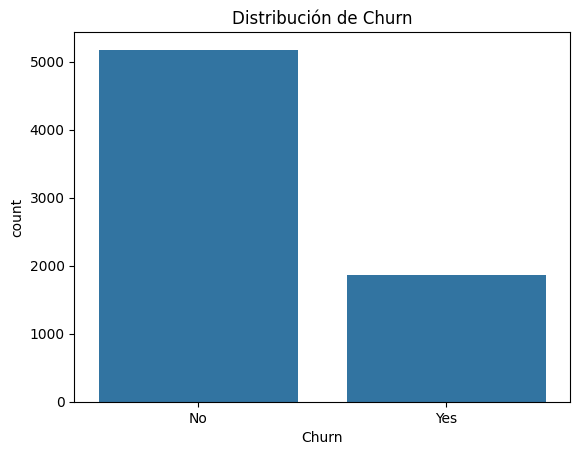

In [8]:
# Visualizar la distribución de la variable objetivo (Churn)
sns.countplot(x='Churn', data=df)
plt.title('Distribución de Churn')
plt.show()


In [9]:
# Verificar el desbalanceo de clases
class_counts = df['Churn'].value_counts()
print("Recuento de cada clase:")
print(class_counts)

Recuento de cada clase:
Churn
No     5174
Yes    1869
Name: count, dtype: int64


In [10]:
# Borramos columna customerID
df.drop('customerID', axis=1, inplace=True)

Balanceo

In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer


In [12]:
from sklearn.preprocessing import LabelEncoder
# Definir la variable objetivo
target = 'Churn'

In [13]:
# Separar características y variable objetivo
X = df.drop(target, axis=1)  # X contiene todas las características
y = df[target]  # y contiene la variable objetivo


In [14]:
# Separar variables numéricas y categóricas
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets', 'numTechTickets']
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']



In [15]:
# Crear un objeto LabelEncoder para cada variable categórica
encoders = {col: LabelEncoder() for col in categorical_columns}

# Codificar cada columna categórica
X_encoded = X.copy()
for col in categorical_columns:
    X_encoded[col] = encoders[col].fit_transform(X[col])

In [16]:
import numpy as np

# Verificar qué columnas numéricas tienen valores vacíos
for col in numerical_columns:
    if X_encoded[col].isin([' ']).sum() > 0:
        print(f"La columna {col} tiene valores vacíos.")

La columna TotalCharges tiene valores vacíos.


In [17]:
# Reemplazar los valores vacíos en la columna 'TotalCharges' por 0
X_encoded['TotalCharges'] = X_encoded['TotalCharges'].replace(' ', 0)

In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded.values, y)

In [19]:
print("Después de aplicar SMOTE:")
print(pd.Series(y_resampled).value_counts())


Después de aplicar SMOTE:
Churn
No     5174
Yes    5174
Name: count, dtype: int64


In [20]:
!pip install pycaret

In [21]:
pip install mlflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.6/147.6 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.9/202.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.8/52.8 kB 2.8 MB/s eta 0:00:00


In [22]:
ros_dataset = pd.DataFrame(X_resampled, columns=X_encoded.columns)
ros_dataset['Churn'] = y_resampled

# Verificar la forma del DataFrame
print("Dimensiones del DataFrame 'ros_dataset':", ros_dataset.shape)

Dimensiones del DataFrame 'ros_dataset': (10348, 22)



Este código crea un nuevo DataFrame llamado ros_dataset que combina las características aumentadas obtenidas después de aplicar SMOTE con su respectiva codificación de la variable objetivo 'Churn'.

In [24]:
from pycaret.classification import *

# Configurar el entorno de PyCaret para clasificación VC=5, Split0.8, Balanceo
clf = setup(data=ros_dataset, target='Churn', session_id=123, log_experiment=True,
            experiment_name='Churn', fix_imbalance=True, normalize=True,
            normalize_method='zscore', train_size=0.8, fold=5)


,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(10348, 22)"
5,Transformed data shape,"(10348, 22)"
6,Transformed train set shape,"(8278, 22)"
7,Transformed test set shape,"(2070, 22)"
8,Numeric features,21
9,Preprocess,True


2024/04/30 23:03:17 INFO mlflow.tracking.fluent: Experiment with name 'Churn' does not exist. Creating a new experiment.


In [25]:
# Comparación modelos
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9008,0.9589,0.9008,0.9008,0.9008,0.8016,0.8017,1.4520
lightgbm,Light Gradient Boosting Machine,0.9008,0.9710,0.9008,0.9009,0.9008,0.8016,0.8018,0.9780
rf,Random Forest Classifier,0.8999,0.9658,0.8999,0.8999,0.8999,0.7997,0.7997,1.1240
xgboost,Extreme Gradient Boosting,0.8984,0.9696,0.8984,0.8984,0.8984,0.7968,0.7968,0.5320
gbc,Gradient Boosting Classifier,0.8955,0.9691,0.8955,0.8957,0.8955,0.7910,0.7912,2.2420
ada,Ada Boost Classifier,0.8913,0.9650,0.8913,0.8915,0.8913,0.7826,0.7828,0.5800
dt,Decision Tree Classifier,0.8566,0.8571,0.8566,0.8567,0.8566,0.7132,0.7133,0.2080
qda,Quadratic Discriminant Analysis,0.8525,0.9277,0.8525,0.8539,0.8523,0.7050,0.7064,0.1680
lr,Logistic Regression,0.8477,0.9287,0.8477,0.8496,0.8475,0.6953,0.6973,1.6220
ridge,Ridge Classifier,0.8416,0.9237,0.8416,0.8470,0.8410,0.6833,0.6886,0.2720


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**Evaluación de las métricas**

**Extra Trees Classifier:**
Precisión (Accuracy): 0.9008
Área bajo la curva ROC (AUC): 0.9589
Recall: 0.9008
Precisión: 0.9008
Puntuación F1: 0.9008
Kappa: 0.8016
Coeficiente de Correlación de Matthews (MCC): 0.8017
Tiempo de entrenamiento: 1.4520 segundos

**Light Gradient Boosting Machine:**
Precisión (Accuracy): 0.9008
Área bajo la curva ROC (AUC): 0.9710
Recall: 0.9008
Precisión: 0.9009
Puntuación F1: 0.9008
Kappa: 0.8016
Coeficiente de Correlación de Matthews (MCC): 0.8018
Tiempo de entrenamiento: 0.9780 segundos

Ambos modelos lograron resultados similares en términos de precisión, recall y puntuación F1. Sin embargo, el modelo Light Gradient Boosting Machine obtuvo un AUC ligeramente más alto que el Extra Trees Classifier, lo que indica una mejor capacidad para distinguir entre las clases positiva y negativa.

Ambos modelos entrenados con SMOTE lograron un rendimiento sólido en la clasificación de datos desbalanceados. El Light Gradient Boosting Machine mostró una ligera ventaja en términos de AUC, pero ambos modelos son opciones viables dependiendo de las necesidades específicas del problema y las preferencias del usuario. Además, el tiempo de entrenamiento fue razonable para ambos modelos, lo que indica una buena eficiencia computacional.

In [26]:
from imblearn.over_sampling import ADASYN

# Aplicar ADASYN
X_resampled, y_resampled = ADASYN(random_state=123).fit_resample(X_encoded, y)

# Verificar el balance de clases después de aplicar ADASYN
print("Después de aplicar ADASYN:")
print(pd.Series(y_resampled).value_counts())


Después de aplicar ADASYN:
Churn
Yes    5228
No     5174
Name: count, dtype: int64


In [27]:
# Creación de datos con adasyn
ada_dataset = X_resampled
ada_dataset['Churn'] = y_resampled
ada_dataset.shape

(10402, 22)

In [28]:
from pycaret.classification import *
clf = setup(data=ada_dataset, target='Churn', session_id=123, log_experiment=True,
            experiment_name='Churn', fix_imbalance=True, normalize=True,
            normalize_method='zscore', train_size=0.8, fold=5)

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(10402, 22)"
5,Transformed data shape,"(10445, 22)"
6,Transformed train set shape,"(8364, 22)"
7,Transformed test set shape,"(2081, 22)"
8,Numeric features,21
9,Preprocess,True


In [ ]:
#Comparación de modelos
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8885,0.9598,0.8885,0.8891,0.8884,0.7769,0.7776,0.3910
rf,Random Forest Classifier,0.8859,0.9560,0.8859,0.8865,0.8858,0.7717,0.7723,0.7380
lightgbm,Light Gradient Boosting Machine,0.8850,0.9597,0.8850,0.8861,0.8849,0.7700,0.7711,0.8410
gbc,Gradient Boosting Classifier,0.8757,0.9508,0.8757,0.8783,0.8755,0.7513,0.7540,1.2300
et,Extra Trees Classifier,0.8753,0.9462,0.8753,0.8757,0.8753,0.7505,0.7510,0.6970
ada,Ada Boost Classifier,0.8691,0.9432,0.8691,0.8714,0.8689,0.7381,0.7404,0.4620
lr,Logistic Regression,0.8525,0.9329,0.8525,0.8544,0.8523,0.7049,0.7069,1.1730
qda,Quadratic Discriminant Analysis,0.8496,0.9291,0.8496,0.8537,0.8491,0.6990,0.7032,0.0640
lda,Linear Discriminant Analysis,0.8433,0.9287,0.8433,0.8484,0.8427,0.6864,0.6916,0.0640
ridge,Ridge Classifier,0.8432,0.9287,0.8432,0.8483,0.8425,0.6861,0.6913,0.0620


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**ADASYN** es una técnica de sobremuestreo adaptativa que se utiliza para tratar el desbalance de clases en conjuntos de datos. A diferencia de SMOTE, ADASYN genera instancias sintéticas de la clase minoritaria con una mayor densidad en regiones donde las clases están mal representadas. Mitiga el problema de la sobreproducción de instancias sintéticas en áreas ya bien representadas de la clase minoritaria.Después de aplicar ADASYN para abordar el desbalance de clases en nuestro conjunto de datos, evaluamos el rendimiento de los modelos utilizando diversas métricas de clasificación.

**Extreme Gradient Boosting (XGBoost):**
Precisión (Accuracy): 0.8885
Área bajo la curva ROC (AUC): 0.9598
Recall: 0.8885
Precisión: 0.8891
Puntuación F1: 0.8884
Kappa: 0.7769
Coeficiente de Correlación de Matthews (MCC): 0.7776
Tiempo de entrenamiento: 0.3910 segundos

**Random Forest Classifier:**
Precisión (Accuracy): 0.8859
Área bajo la curva ROC (AUC): 0.9560
Recall: 0.8859
Precisión: 0.8865
Puntuación F1: 0.8858
Kappa: 0.7717
Coeficiente de Correlación de Matthews (MCC): 0.7723
Tiempo de entrenamiento: 0.7380 segundos

Ambos modelos entrenados después de aplicar ADASYN lograron un rendimiento sólido en la clasificación de datos desbalanceados. El modelo Extreme Gradient Boosting (XGBoost) mostró un AUC ligeramente más alto que el Random Forest Classifier, lo que indica una mejor capacidad para distinguir entre las clases positiva y negativa. Además, ambos modelos alcanzaron valores similares en otras métricas de evaluación, como precisión, recall, precisión y puntuación F1.


In [29]:
from imblearn.combine import SMOTEENN

# Aplicar SMOTEENN
X_resampled, y_resampled = SMOTEENN(random_state=123).fit_resample(X_encoded, y)

# Verificar el balance de clases después de aplicar SMOTEENN
print("Después de aplicar SMOTEENN:")
print(pd.Series(y_resampled).value_counts())


Después de aplicar SMOTEENN:
Churn
Yes    3412
No     2765
Name: count, dtype: int64


In [30]:
teen_dataset = X_resampled
teen_dataset['Churn'] = y_resampled
teen_dataset.shape

(6177, 22)

In [31]:
from pycaret.classification import *
clf = setup(data=teen_dataset, target='Churn', session_id=123, log_experiment=True,
            experiment_name='Churn', fix_imbalance=True, normalize=True,
            normalize_method='zscore', train_size=0.8, fold=5)

,Description,Value
0,Session id,123
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(6177, 22)"
5,Transformed data shape,"(6694, 22)"
6,Transformed train set shape,"(5458, 22)"
7,Transformed test set shape,"(1236, 22)"
8,Numeric features,21
9,Preprocess,True


In [32]:
#Comparación de modelos
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9690,0.9943,0.9690,0.9691,0.9690,0.9373,0.9374,1.0220
xgboost,Extreme Gradient Boosting,0.9688,0.9945,0.9688,0.9689,0.9688,0.9369,0.9370,0.3400
rf,Random Forest Classifier,0.9670,0.9934,0.9670,0.9671,0.9670,0.9332,0.9333,0.6020
gbc,Gradient Boosting Classifier,0.9613,0.9926,0.9613,0.9614,0.9613,0.9217,0.9218,1.2020
et,Extra Trees Classifier,0.9609,0.9921,0.9609,0.9610,0.9609,0.9209,0.9210,0.5080
ada,Ada Boost Classifier,0.9577,0.9913,0.9577,0.9578,0.9577,0.9143,0.9145,0.3900
dt,Decision Tree Classifier,0.9504,0.9498,0.9504,0.9504,0.9504,0.8997,0.8997,0.1780
lr,Logistic Regression,0.9478,0.9888,0.9478,0.9478,0.9478,0.8944,0.8945,1.2460
qda,Quadratic Discriminant Analysis,0.9423,0.9851,0.9423,0.9426,0.9424,0.8836,0.8837,0.1220
svm,SVM - Linear Kernel,0.9387,0.9850,0.9387,0.9390,0.9387,0.8762,0.8764,0.1320


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**SMOTEENN** es una técnica que combina el sobremuestreo sintético (SMOTE) con el submuestreo de instancias de la clase mayoritaria utilizando el Algoritmo de Vecinos Cercanos Editados (ENN). Su objetivo es abordar el desbalance de clases creando instancias sintéticas de la clase minoritaria mediante SMOTE, y luego eliminando instancias de la clase mayoritaria que se clasifican incorrectamente por el algoritmo de vecinos cercanos. Este enfoque busca mejorar la generalización del modelo al tiempo que reduce el riesgo de sobreajuste.

**Resultados para el modelo de Light Gradient Boosting Machine (LightGBM) después de aplicar SMOTEENN:**

**Precisión (Accuracy):** El modelo alcanzó una precisión del 96.95%, lo que indica que el 96.90 % de las predicciones realizadas por el modelo fueron correctas.

**Área bajo la curva ROC (AUC):** El valor de AUC fue de 0.9943, lo que sugiere que el modelo tiene una excelente capacidad para distinguir entre las clases positiva y negativa.

**Recall:** El modelo alcanzó un recall del 96.90%, lo que significa que el 96.90% de los casos positivos fueron correctamente identificados por el modelo.

**Precisión (Precision):** La precisión del modelo fue del 96.91%, lo que indica que el 96.91% de las predicciones positivas fueron correctas.

**Puntuación F1 (F1-score):** El modelo obtuvo una puntuación F1 del 96.90%, que es una medida del equilibrio entre precisión y recall.

**Kappa y MCC:** El coeficiente Kappa y la correlación de Matthews (MCC) fueron del 93.72% y 93.74%, respectivamente, lo que sugiere un excelente nivel de acuerdo entre las predicciones del modelo y las observaciones reales.

**Tiempo de entrenamiento (TT):** El tiempo de entrenamiento fue de 1.022 segundos, lo que indica que el modelo pudo entrenarse eficientemente en un tiempo razonable.

Podemos concluir que el modelo de **Light Gradient Boosting Machine (LightGBM)** entrenado después de aplicar SMOTEENN demostró un rendimiento excepcional en la clasificación de nuestro conjunto de datos desbalanceado, con valores sobresalientes en todas las métricas evaluadas.

El modelo es altamente efectivo para abordar el problema de clasificación en cuestión, con una capacidad de generalización muy robusta y un bajo riesgo de sobreajuste.

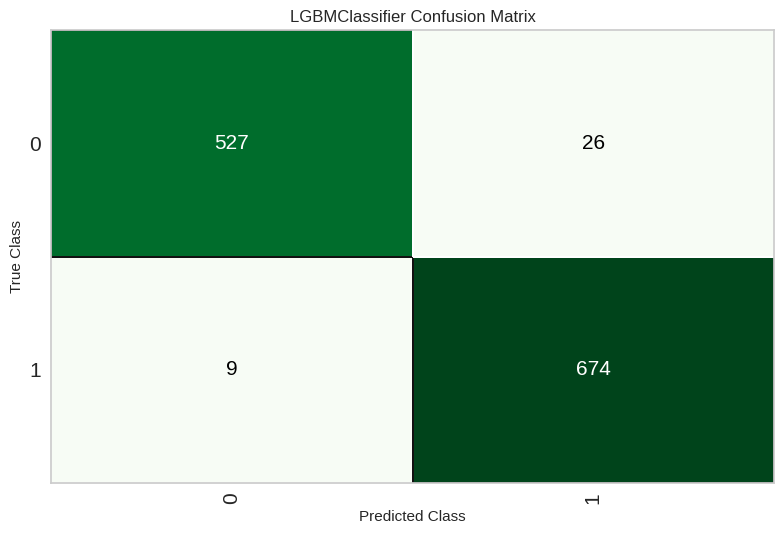

In [33]:
# Análisis del Modelo
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

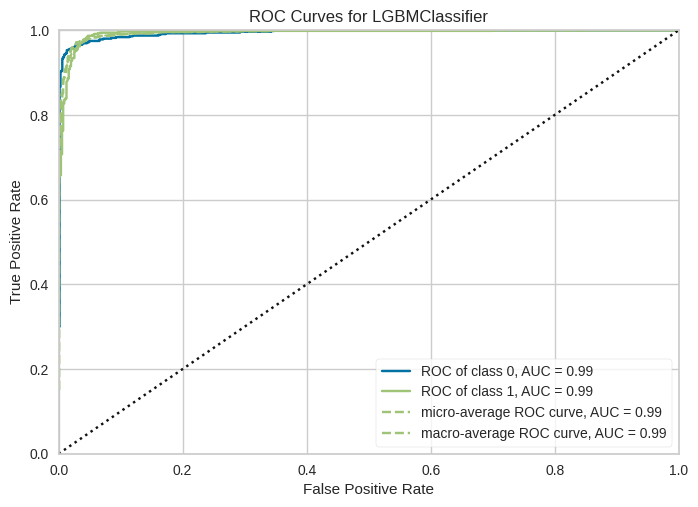

In [34]:
# plot AUC
plot_model(best, plot = 'auc')

Predicciones

In [35]:
# predict on test set
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9717,0.9938,0.9717,0.9720,0.9716,0.9426,0.9429


In [36]:
# show predictions df
holdout_pred.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn,prediction_label,prediction_score
4788,0,0,1,0,8,1,2,1,0,0,...,0,1,0,85.183075,758.470703,1,0,Yes,Yes,0.9993
5824,0,0,1,0,50,1,0,1,1,0,...,0,0,2,86.631073,4351.908691,0,2,Yes,Yes,0.9949
5997,1,0,0,0,1,1,0,0,0,2,...,0,0,2,50.738132,50.738132,0,0,Yes,Yes,0.9825
4607,0,0,0,0,1,1,2,1,0,0,...,0,0,2,85.451698,85.451698,0,0,Yes,Yes,0.9997
1122,0,0,1,1,39,1,0,2,1,1,...,2,0,3,19.750000,757.950012,0,0,No,No,0.9998


Crear Modelo

In [37]:
lightgbm = create_model('lightgbm')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9687,0.9948,0.9687,0.9687,0.9686,0.9366,0.9366
1,0.9676,0.9933,0.9676,0.9676,0.9676,0.9344,0.9345
2,0.9727,0.9961,0.9727,0.9728,0.9726,0.9446,0.9448
3,0.9717,0.9962,0.9717,0.9717,0.9717,0.9427,0.9427
4,0.9646,0.9909,0.9646,0.9646,0.9645,0.9283,0.9284
Mean,0.9690,0.9943,0.9690,0.9691,0.9690,0.9373,0.9374
Std,0.0029,0.0020,0.0029,0.0029,0.0029,0.0059,0.0059


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

No se va a seguir tuneando el modelo por el gran desempeño logrado

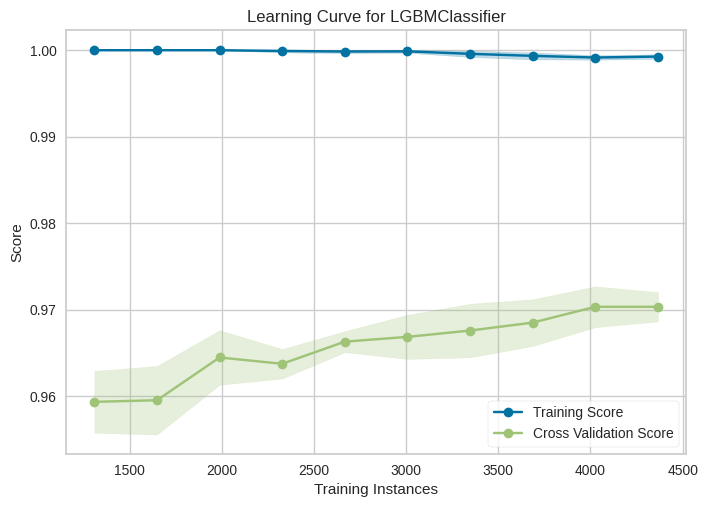

In [38]:
plot_model (lightgbm, plot='learning')


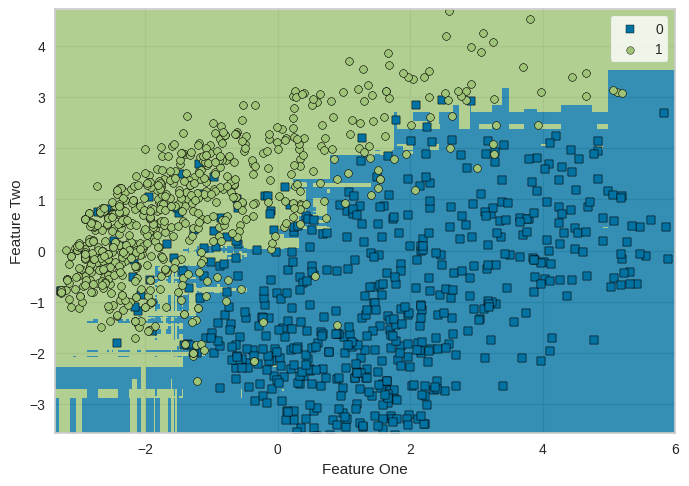

In [39]:
plot_model(lightgbm, plot = 'boundary')

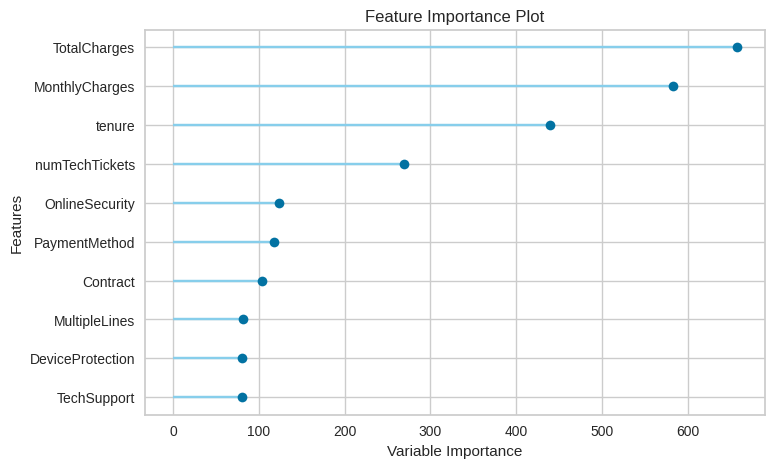

In [40]:
plot_model(lightgbm, plot = 'feature')

Podemos observar que los cargos totales y  mensuales al igual que la antigúedad son las variables que mayor imporstancia tiene en el Ensamble para abandonar el servicio.

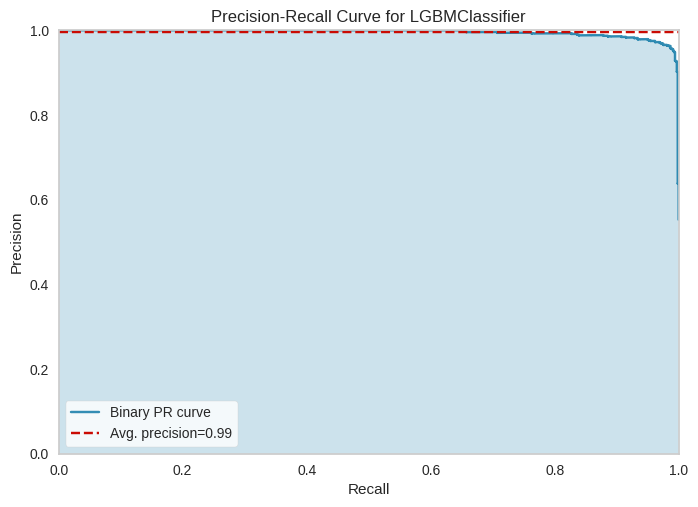

In [41]:
plot_model(lightgbm, plot = 'pr')

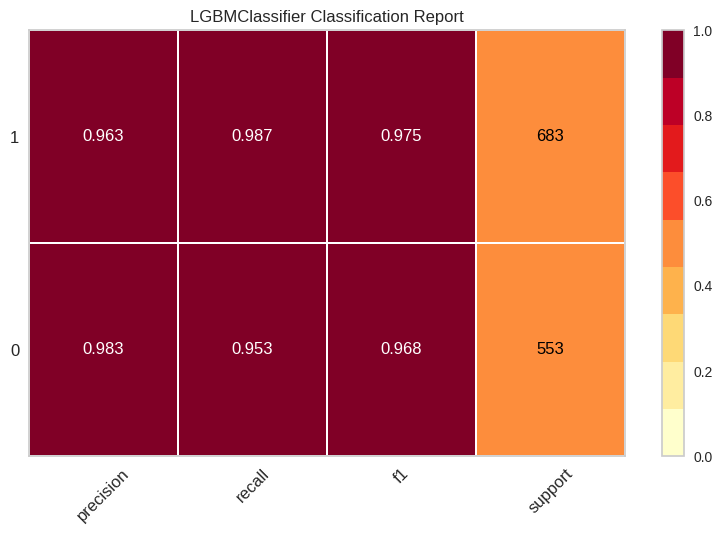

In [42]:
plot_model(lightgbm, plot = 'class_report')

In [43]:
# Finalización del modelo
final_model = finalize_model (lightgbm)

In [44]:
print (final_model)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['gender', 'SeniorCitizen',
                                             'Partner', 'Dependents', 'tenure',
                                             'PhoneService', 'MultipleLines',
                                             'InternetService',
                                             'OnlineSecurity', 'OnlineBackup',
                                             'D...
                 LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                colsample_bytree=1.0, importance_type='split',
                                learning_rate=0.1, max_depth=-1,
                                min_child_sam

In [45]:
save_model(final_model,'FinalModel')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['gender', 'SeniorCitizen',
                                              'Partner', 'Dependents', 'tenure',
                                              'PhoneService', 'MultipleLines',
                                              'InternetService',
                                              'OnlineSecurity', 'OnlineBackup',
                                              'D...
                  LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, importance_type='split',
                                 learning_rate=0.1, max_depth=-1,
                              

**Conclusiones**
En este estudio, se evalúa el rendimiento de diversos modelos de aprendizaje automático (Extra Trees Classifier, Light Gradient Boosting Machine, XGBoost y Random Forest Classifier) para predecir el abandono del servicio en un conjunto de datos específico. Se comparan los modelos en base a métricas como precisión, AUC, recall, F1-score, kappa y MCC.

**Abordaje del desequilibrio de clases:**

Dado que el conjunto de datos presenta un desequilibrio de clases, se utilizan técnicas de sobremuestreo como SMOTE, ADASYN y SMOTEENN para balancear las clases antes del entrenamiento de los modelos.

**Resultados:**

La mayoría de los modelos alcanzan un buen rendimiento, con una precisión cercana al 90% y un AUC superior al 95% después de aplicar técnicas de muestreo.
XGBoost y LightGBM, en conjunto con SMOTEENN, obtienen los mejores resultados, con una precisión superior al 96% y un AUC superior al 99%.
Las variables más importantes para predecir el abandono del servicio son los cargos totales, los cargos mensuales y la antigüedad.
Conclusiones:

Los modelos de aprendizaje automático son herramientas efectivas para predecir el abandono del servicio.
XGBoost y LightGBM, combinados con SMOTEENN, son los modelos más adecuados para esta tarea.
Las variables relacionadas con los costos y la antigüedad del cliente son cruciales para la predicción del abandono del servicio.

**Recomendaciones:**

Se sugiere implementar el modelo de mejor rendimiento (XGBoost o LightGBM con SMOTEENN) en un sistema de producción para predecir el abandono del servicio y tomar medidas preventivas.
Se recomienda realizar un análisis más profundo de las variables que influyen en el abandono del servicio para identificar oportunidades de mejora en la atención al cliente y la retención de clientes.